# Unsupervised-Hierarchical

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

# Initialize the postgres engine
engine = create_engine(f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}')

data = pd.read_sql('SELECT * from {}'.format(postgres_db), con=engine)

engine.dispose()

In [12]:
heartdisease_df = data.copy()
heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [13]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

### 1. Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

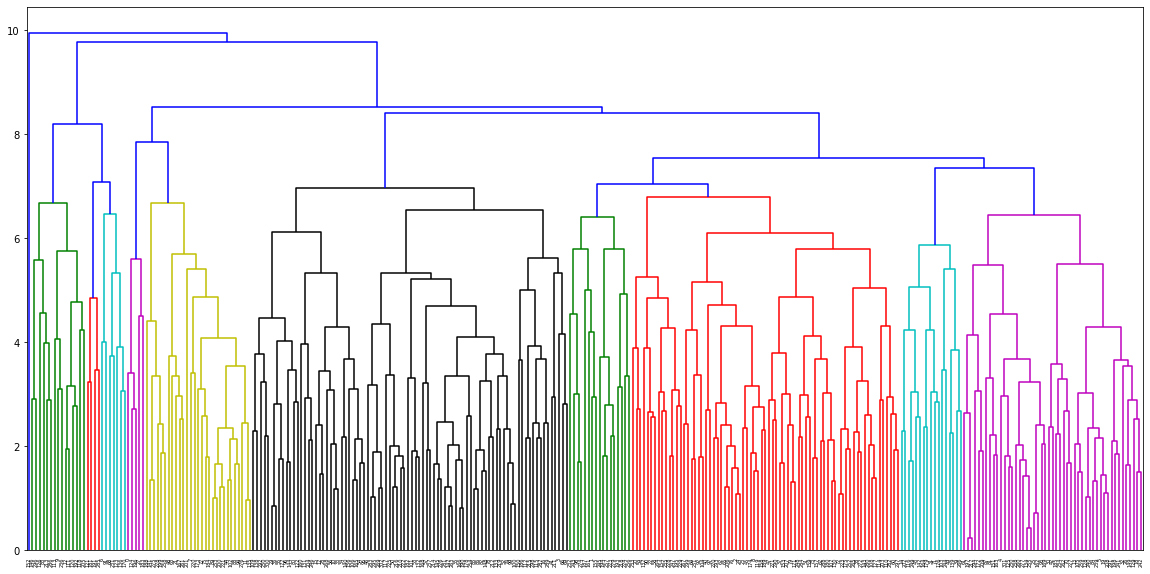

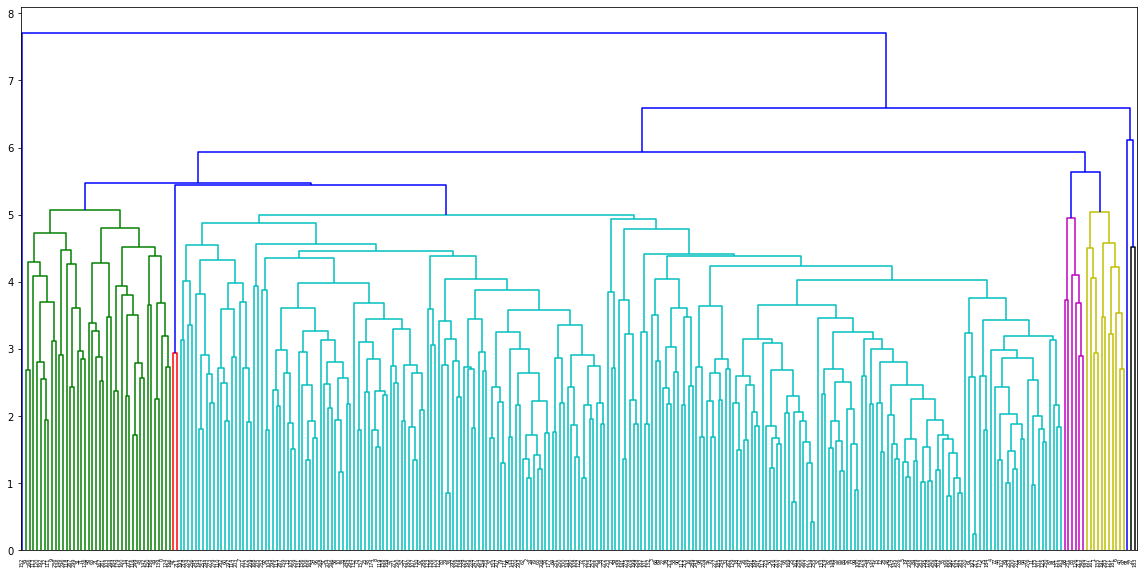

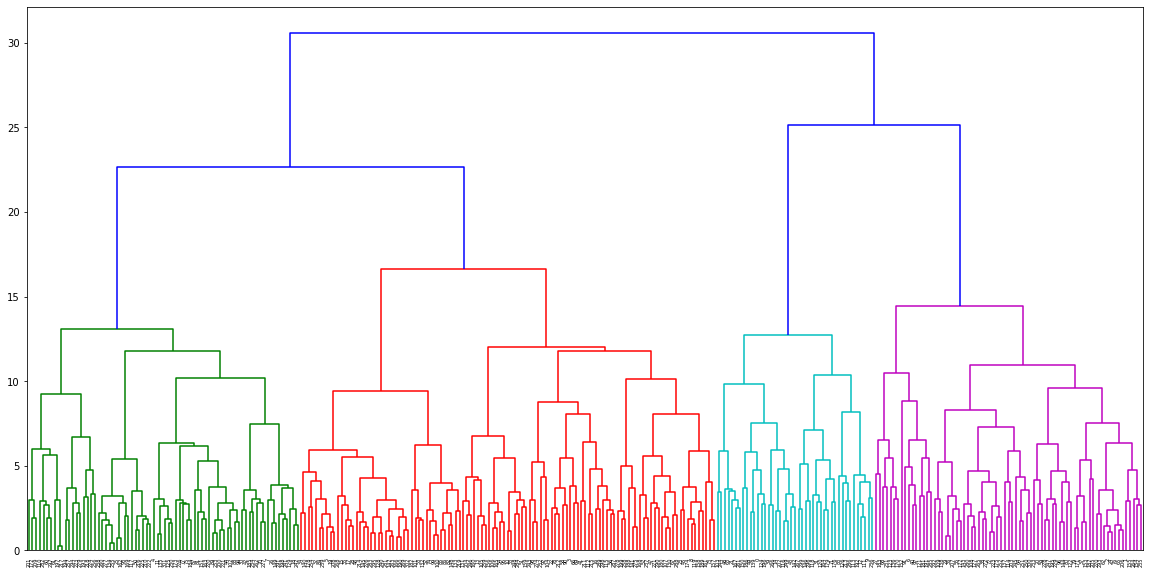

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
methods = ['complete', 'average', 'ward']

for method in methods:
    plt.figure(figsize=(20,10))
    dendrogram(linkage(X_std, method=method))
    plt.show()

I think the 'ward' method produced the most reasonable results. It was the only one that didn't make separate clusters for one outlier.

### 2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

for method in methods:
    affinity='cosine'
    if method == 'ward': affinity='euclidean'
    agg_clust = AgglomerativeClustering(n_clusters=2, 
                                        linkage=method, 
                                        affinity=affinity)

    preds = agg_clust.fit_predict(X_std)
    print(method)
    print(metrics.adjusted_rand_score(y, preds))
    print(metrics.silhouette_score(X_std, preds, metric='euclidean'))
    print('------------------------------------------------------------')

complete
0.21394030618551016
0.11730765444448985
------------------------------------------------------------
average
0.2940490133353465
0.14837359969689895
------------------------------------------------------------
ward
0.146129913123814
0.1387197366557222
------------------------------------------------------------


The silhouette scores from the kmeans solution was: `0.17440650461256255`. This makes the k means model with 2 clusters produces datapoints closer to other datapoints in the cluster than thyey are to datapoints in the other clusters.. This is good.